In [4]:
import numpy as np
import csv

# csv 파일 읽어와서 리스트로 변환
f = open('population.csv', 'r', encoding="cp949")
data = csv.reader(f)
next(data)
data = list(data)

In [9]:
# 송파1동의 여성 인구 구조 저장하기
name = "송파1동"
mn = 1
result_name = ''
result = 0

for row in data :
    if name in row[0]:
        home = np.array(row[106:], dtype=int)/int(row[105])

In [11]:
# 송파1동과 비슷한 여성 인구 구조를 가진 지역 찾기
for row in data:
    if int(row[105]) != 0:
        away = np.array(row[106:], dtype=int)/int(row[105])
        s = np.sum((home-away)**2)
        if s < mn and name not in row[0] :
            mn = s
            result_name = row[0]
            result = away

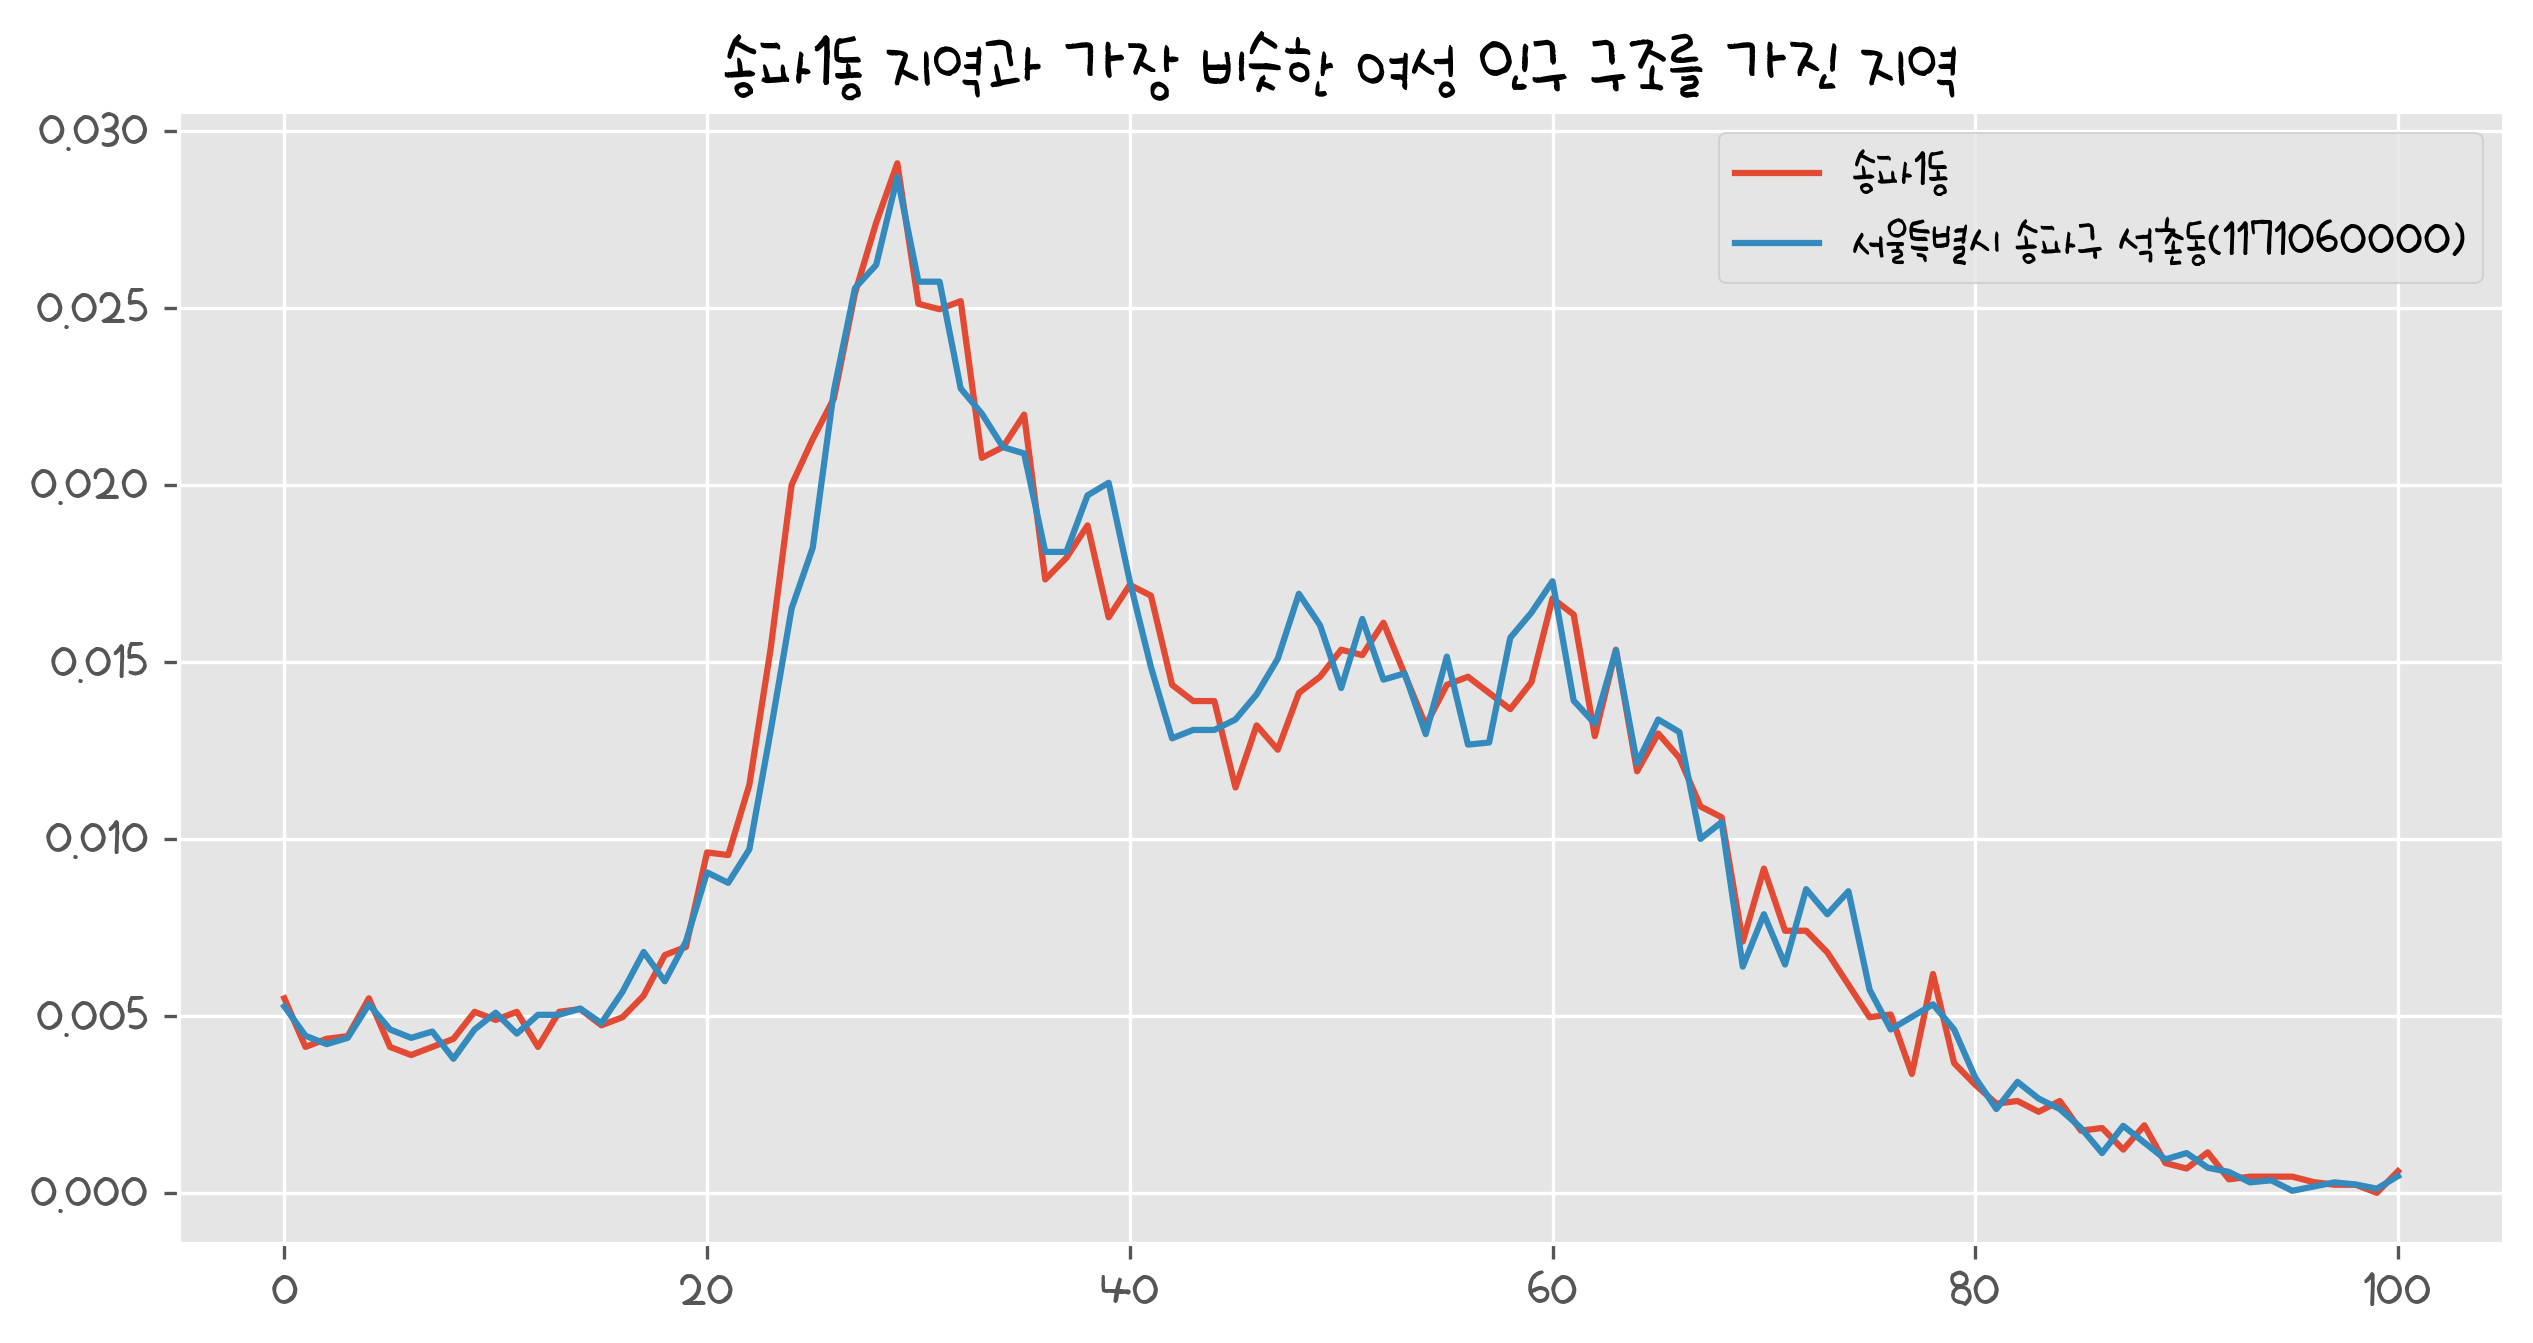

In [13]:
# 꺾은선 그래프로 시각화
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family = 'UhBee Charming')
plt.title(name + ' 지역과 가장 비슷한 여성 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.savefig('songpa.png')
plt.legend()
plt.show()